In [1]:
using ModelingToolkit
using DifferentialEquations
using Plots
using ModelingToolkit: t_nounits as t, D_nounits as D, @variables, @parameters, @named, @unpack, @mtkbuild
using Symbolics

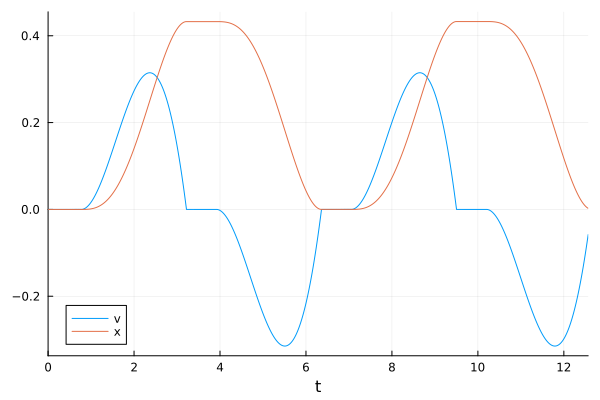

In [4]:
function UnitMassWithFriction(k; name)
    @variables x(t)=0 v(t)=0
    eqs = [D(x) ~ v
           D(v) ~ sin(t) - k * sign(v)]
    System(eqs, t; continuous_events = [v ~ 0], name) # when v = 0 there is a discontinuity
end
@mtkcompile m = UnitMassWithFriction(0.7)
prob = ODEProblem(m, Pair[], (0, 4pi))
sol = solve(prob, Tsit5())
plot(sol)